<a href="https://colab.research.google.com/github/FendyDeveloper/Bank-Transaction-Dataset-for-Fraud-Detection/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Fendy_Rahmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Dataset yang digunakan adalah [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data) . Dataset ini memiliki fitur numerik dan kategorikal serta tidak memiliki label awal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [543]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [545]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [546]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [547]:
# Tinjau jumlah baris dan kolom
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

# Tinjau jenis data di setiap kolom
print("\nInfo tipe data:")
print(df.dtypes)

Jumlah baris: 2512
Jumlah kolom: 16

Info tipe data:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [548]:
# Identifikasi missing values
missing_values = df.isnull().sum()
print("\nJumlah missing values:")
print(missing_values)


Jumlah missing values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [549]:
# Menghapus kolom yang tidak relevan
df = df.drop(["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], axis=1)

In [550]:
# Konversi timestamp ke format numerik
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['transaction_hour'] = df['TransactionDate'].dt.hour
df['transaction_day'] = df['TransactionDate'].dt.day
df['transaction_month'] = df['TransactionDate'].dt.month

In [551]:
# df = df.drop(['TransactionDate','PreviousTransactionDate'], axis=1)

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   LoginAttempts            2512 non-null   int64         
 9   AccountBalance           2512 non-null   float64       
 10  PreviousTransactionDate  2512 non-null   datetime64[ns]
 11  transaction_hour         2512 non-null   int32         
 12  transaction_day          2512 non-

In [553]:
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                     'LoginAttempts', 'AccountBalance']


Statistik Deskriptif Variabel Numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


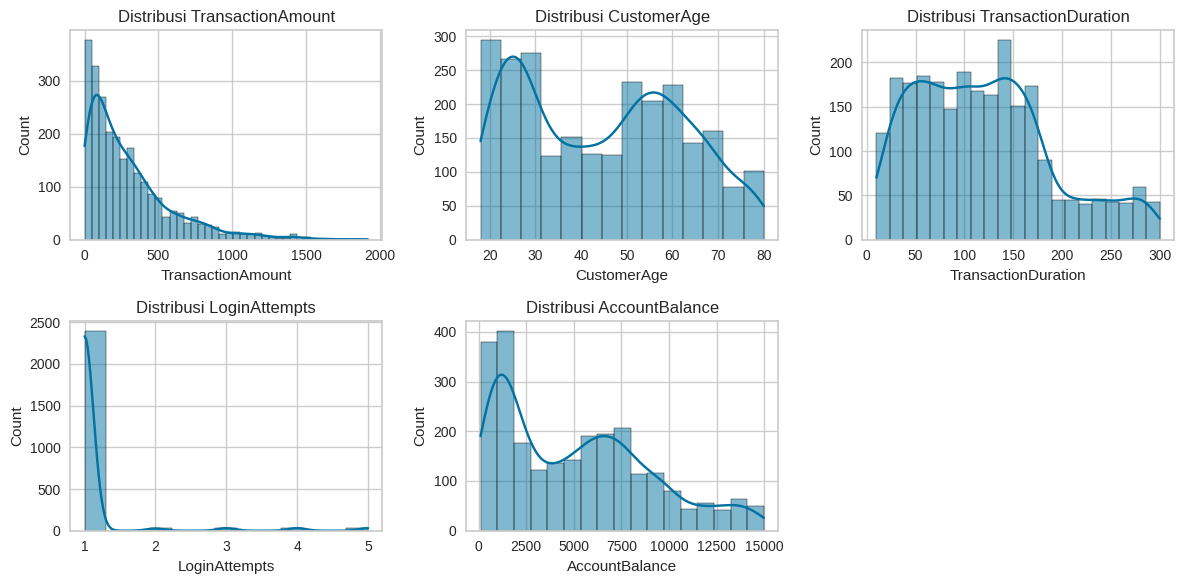

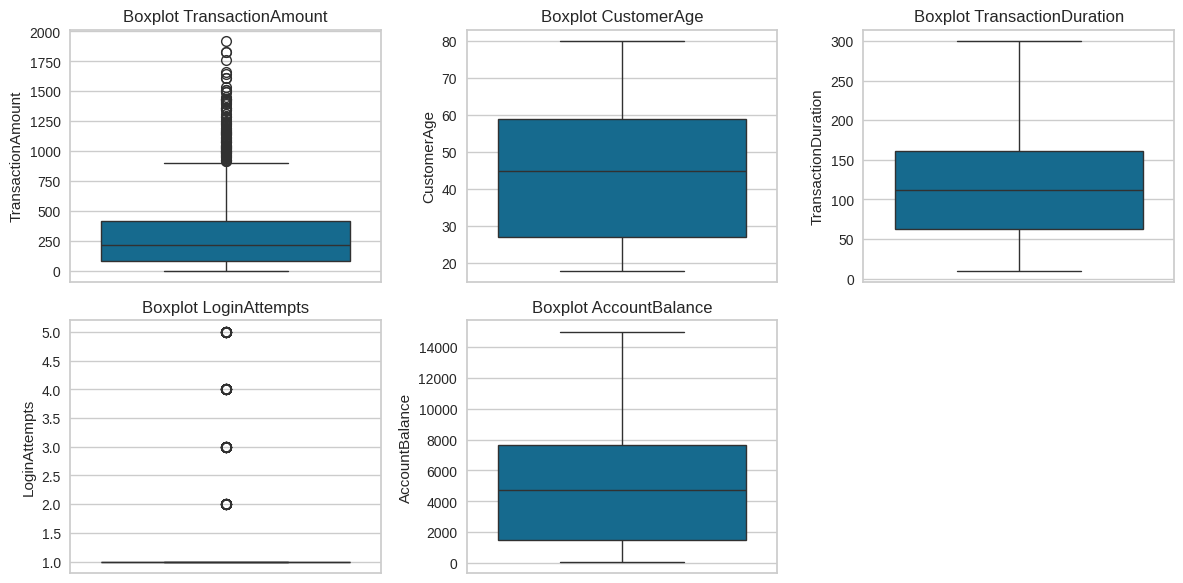

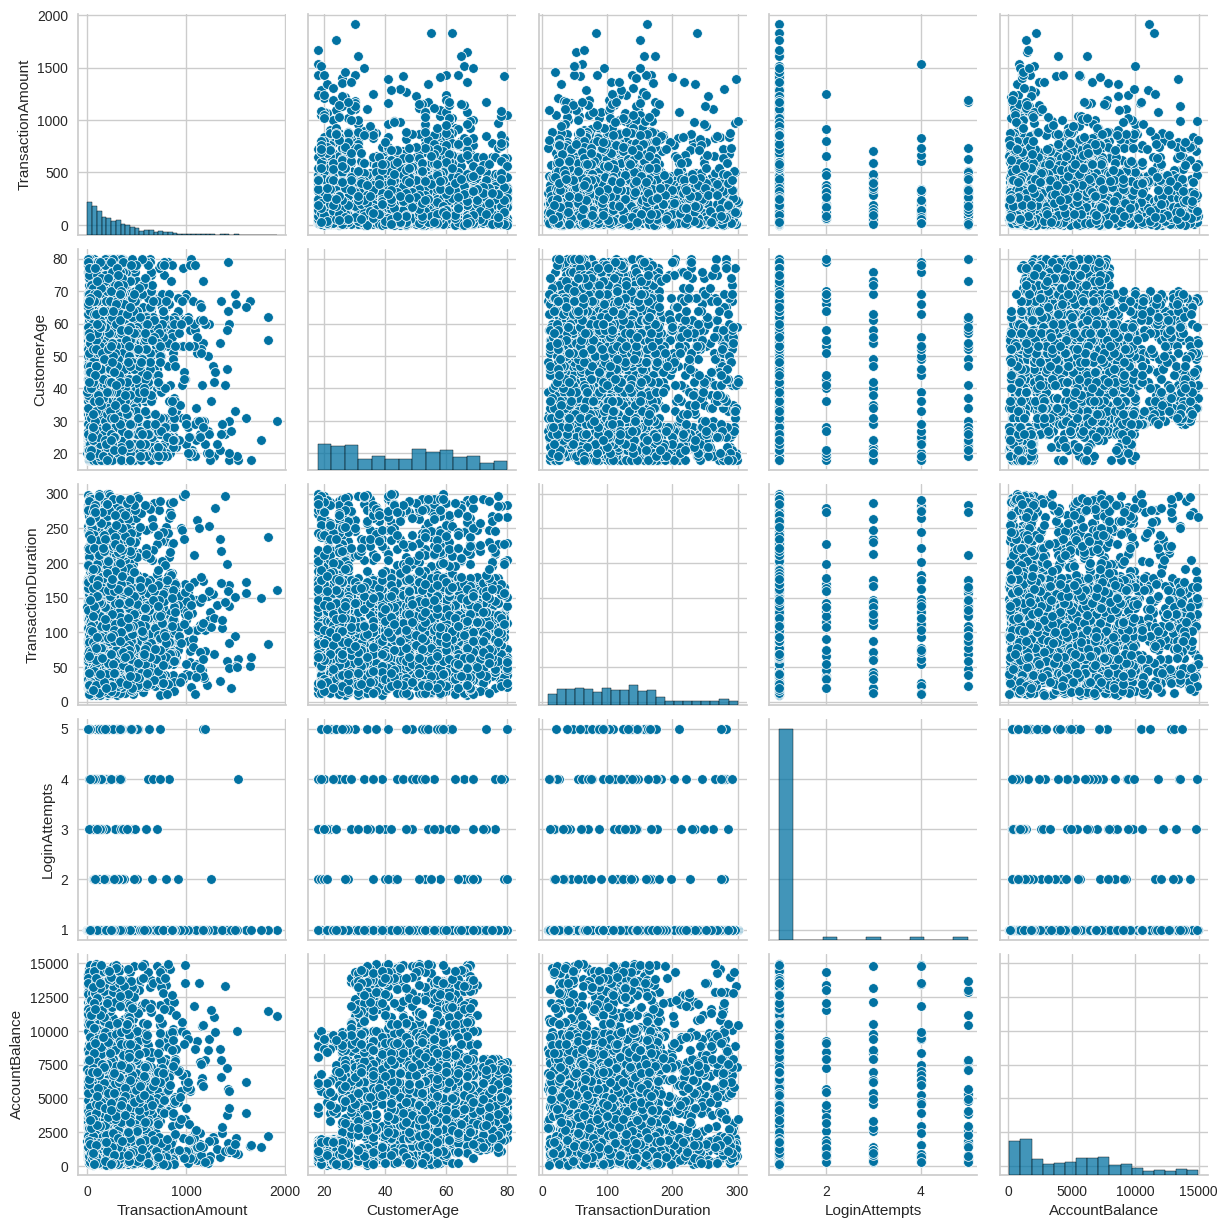

In [554]:
# Analisis Distribusi dan Korelasi

# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif Variabel Numerik:")
print(df[numerical_features].describe())

# Visualisasi distribusi dengan histogram
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Visualisasi distribusi dengan boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Scatter plot untuk beberapa pasang variabel
sns.pairplot(df[numerical_features])
plt.show()


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   LoginAttempts            2512 non-null   int64         
 9   AccountBalance           2512 non-null   float64       
 10  PreviousTransactionDate  2512 non-null   datetime64[ns]
 11  transaction_hour         2512 non-null   int32         
 12  transaction_day          2512 non-

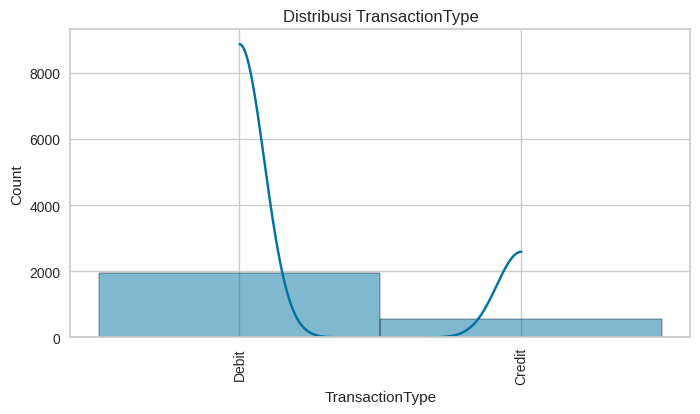

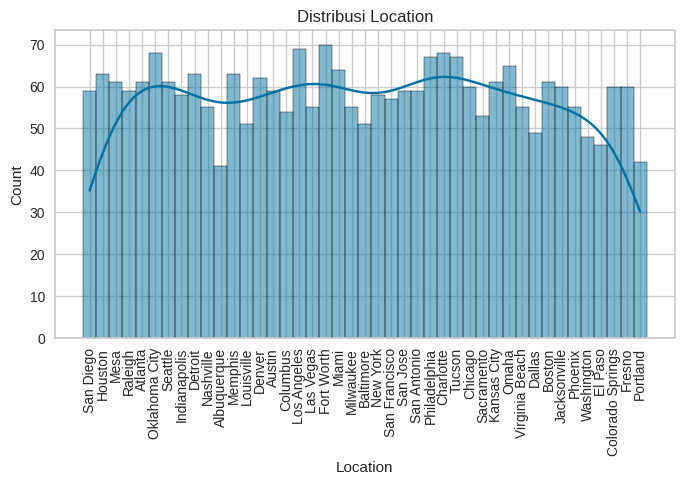

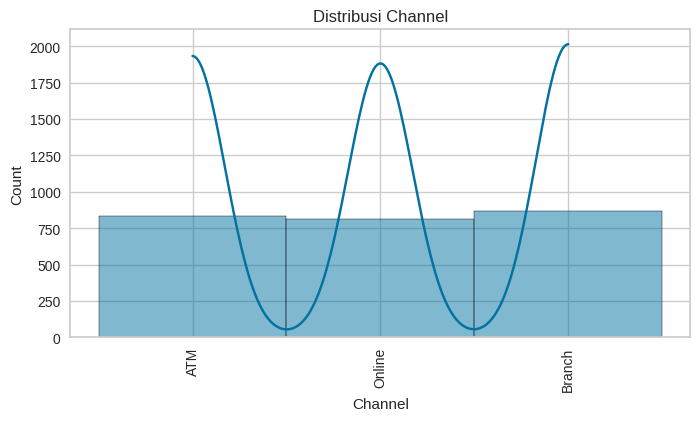

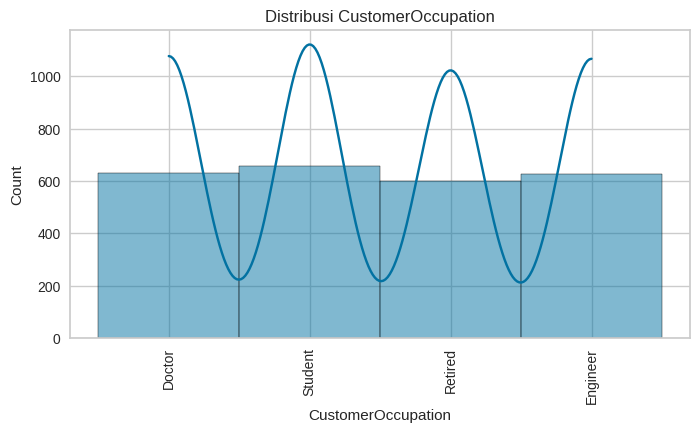

In [556]:
# Analisis distribusi variabel karegorik
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.xticks(rotation=90)
    plt.show()

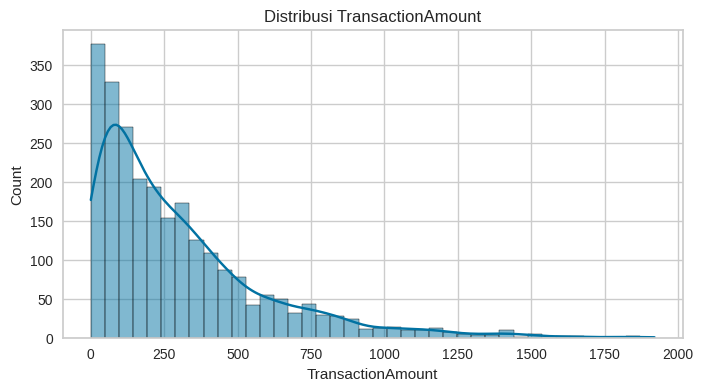

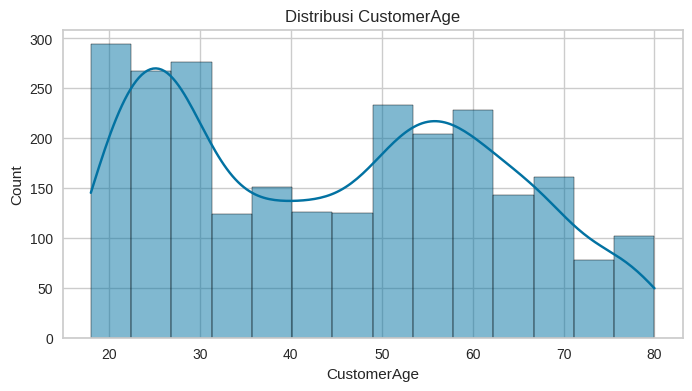

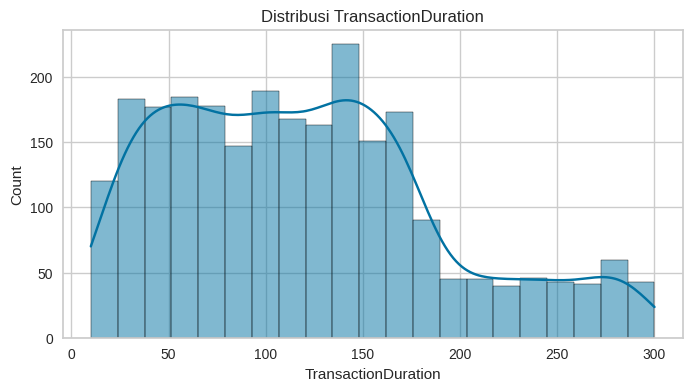

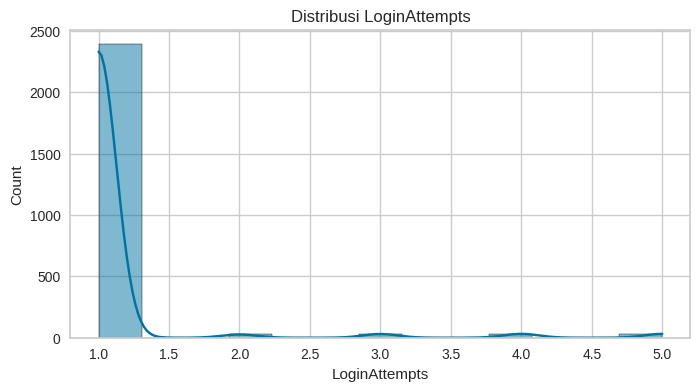

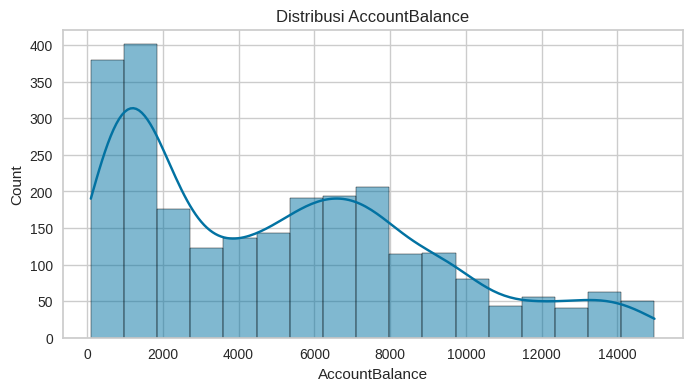

In [557]:
# Analisis distribusi variabel numerik
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                     'LoginAttempts', 'AccountBalance']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

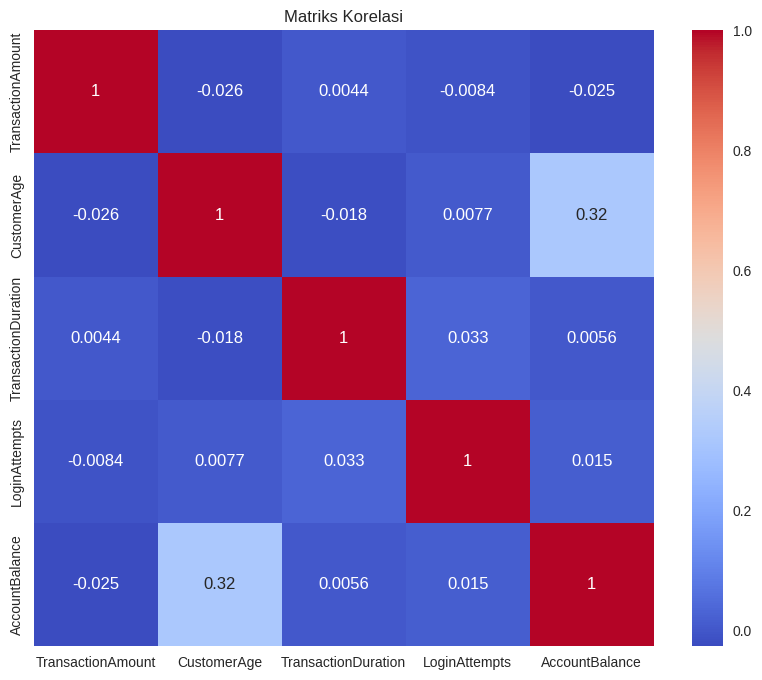

In [558]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   LoginAttempts            2512 non-null   int64         
 9   AccountBalance           2512 non-null   float64       
 10  PreviousTransactionDate  2512 non-null   datetime64[ns]
 11  transaction_hour         2512 non-null   int32         
 12  transaction_day          2512 non-

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [560]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_hour,transaction_day,transaction_month
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,16,11,4
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,16,27,6
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,18,10,7
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,16,5,5
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,17,16,10


In [561]:
# Handle missing values (contoh: mengisi dengan median untuk numerik)
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

Outliers pada fitur TransactionAmount: 113


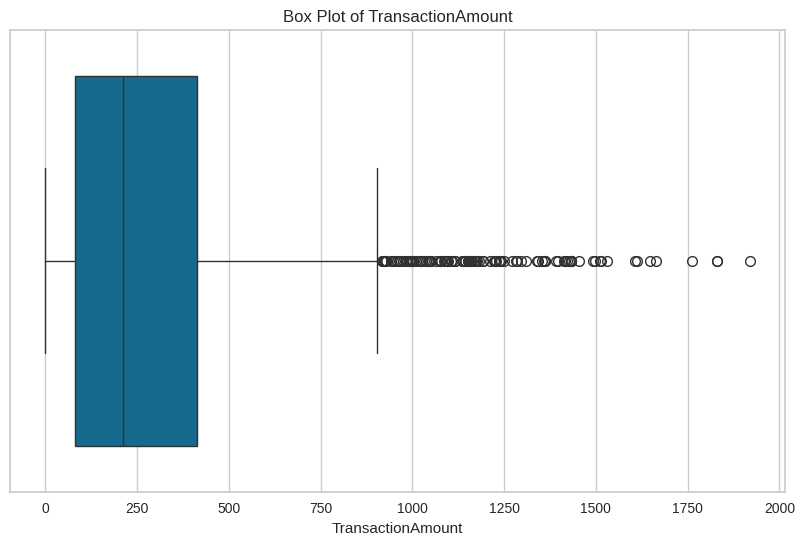

Outliers pada fitur CustomerAge: 0


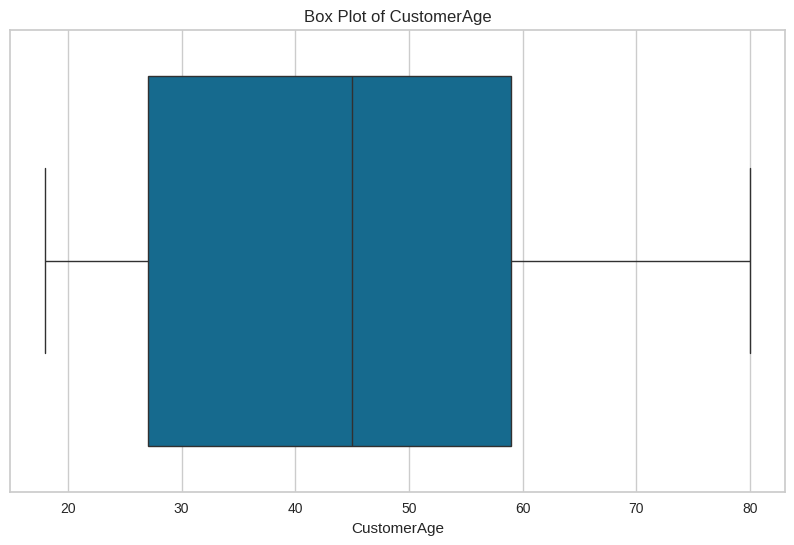

Outliers pada fitur TransactionDuration: 0


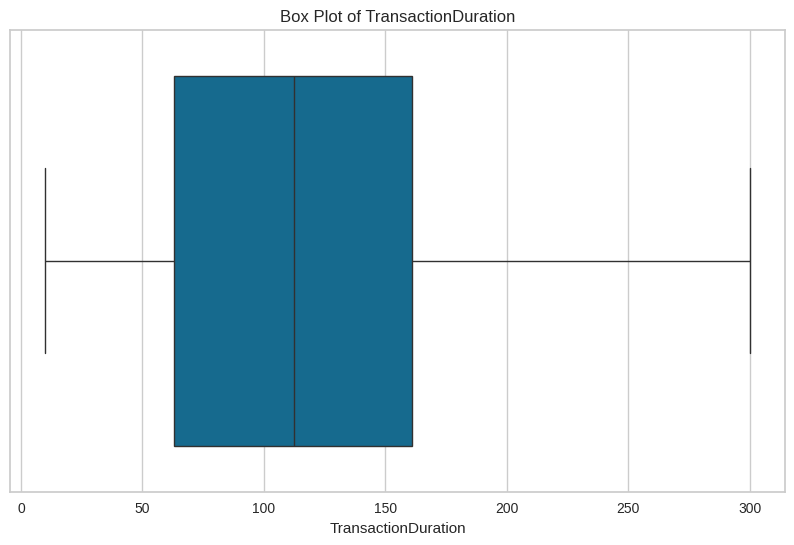

Outliers pada fitur AccountBalance: 0


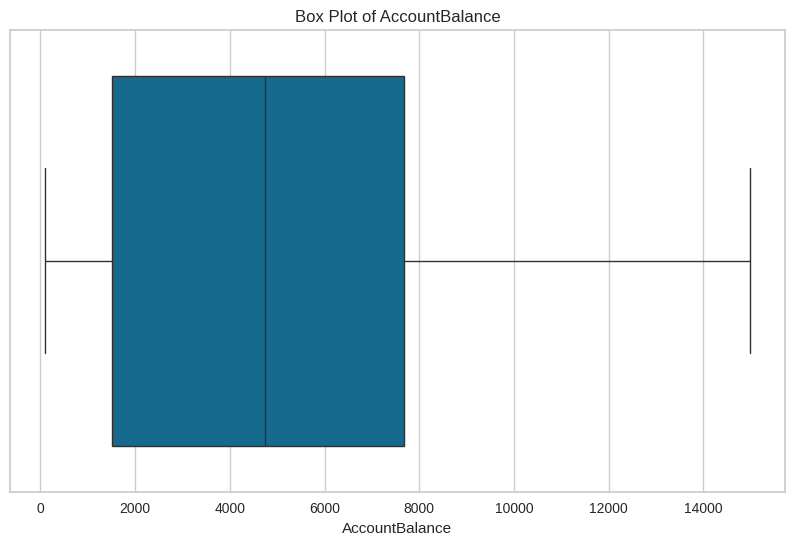

In [562]:
# Cek Outliers menggunakan IQR
selected_features = ['TransactionAmount','CustomerAge', 'TransactionDuration', 'AccountBalance']

for feature in selected_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"Outliers pada fitur {feature}: {len(outliers)}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [563]:
# Capping outliers
for feature in selected_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] > upper_bound, upper_bound,
                                       np.where(df[feature] < lower_bound, lower_bound, df[feature]))

In [564]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_hour,transaction_day,transaction_month
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1,5112.21,2024-11-04 08:08:08,16,11,4
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1,13758.91,2024-11-04 08:09:35,16,27,6
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1,1122.35,2024-11-04 08:07:04,18,10,7
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1,8569.06,2024-11-04 08:09:06,16,5,5
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26.0,Student,198.0,1,7429.40,2024-11-04 08:06:39,17,16,10


In [565]:
# Simpan objek LabelEncoder
encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

In [566]:
for col in categorical_features:
    df[col+'_encoded'] = le.fit_transform(df[col])

In [567]:
# 3. Feature selection untuk clustering
features_for_clustering = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance', 'transaction_hour',
    'TransactionType_encoded', 'Channel_encoded'
]
X = df[features_for_clustering]

In [568]:
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,transaction_hour,TransactionType_encoded,Channel_encoded
0,14.09,70.0,81.0,1,5112.21,16,1,0
1,376.24,68.0,141.0,1,13758.91,16,1,0
2,126.29,19.0,56.0,1,1122.35,18,1,2
3,184.50,26.0,25.0,1,8569.06,16,1,2
4,13.45,26.0,198.0,1,7429.40,17,0,2


In [569]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [570]:
X_scaled

array([[-1.07436059,  1.42371826, -0.55244326, ..., -0.85672852,
         0.54053776, -1.22536106],
       [ 0.36264502,  1.31128706,  0.30531437, ..., -0.85672852,
         0.54053776, -1.22536106],
       [-0.62915272, -1.44327736, -0.90984227, ...,  1.87957415,
         0.54053776,  1.24701402],
       ...,
       [-1.0166661 ,  0.63669986,  0.37679417, ...,  0.51142281,
         0.54053776,  0.01082648],
       [-0.3923434 , -1.21841495, -1.43879281, ..., -0.85672852,
         0.54053776,  1.24701402],
       [-0.1657318 , -1.16219935, -0.38089174, ..., -0.85672852,
        -1.85000952,  1.24701402]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [571]:
kmeans = KMeans(random_state=42)

inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

print(df.head())

   TransactionAmount     TransactionDate  TransactionType  Location  Channel  \
0              14.09 2023-04-11 16:29:14                1        36        0   
1             376.24 2023-06-27 16:44:19                1        15        0   
2             126.29 2023-07-10 18:16:08                1        23        2   
3             184.50 2023-05-05 16:32:11                1        33        2   
4              13.45 2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0              1   
1         68.0                   0                141.0              1   
2         19.0                   3                 56.0              1   
3         26.0                   3                 25.0              1   
4         26.0                   3                198.0              1   

   AccountBalance PreviousTransactionDate  transaction_hour  transaction_d

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

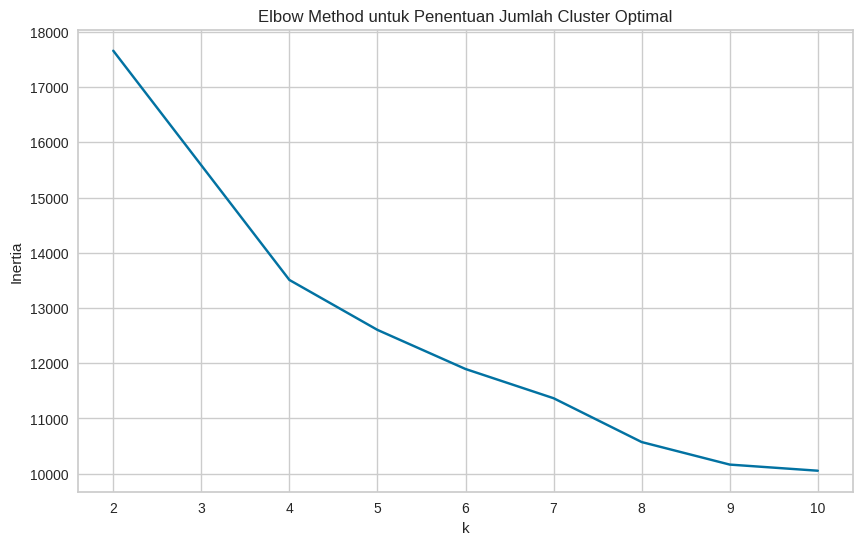

In [572]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal')
plt.show()

Silhouette Score untuk k=2: 0.12947806335615478
Silhouette Score untuk k=3: 0.1498240014538202
Silhouette Score untuk k=4: 0.1649611225156171
Silhouette Score untuk k=5: 0.1518542416520538
Silhouette Score untuk k=6: 0.14464881407157495
Silhouette Score untuk k=7: 0.14946054022469388
Silhouette Score untuk k=8: 0.14986487065600773
Silhouette Score untuk k=9: 0.14323611123745383
Silhouette Score untuk k=10: 0.13913573083018657


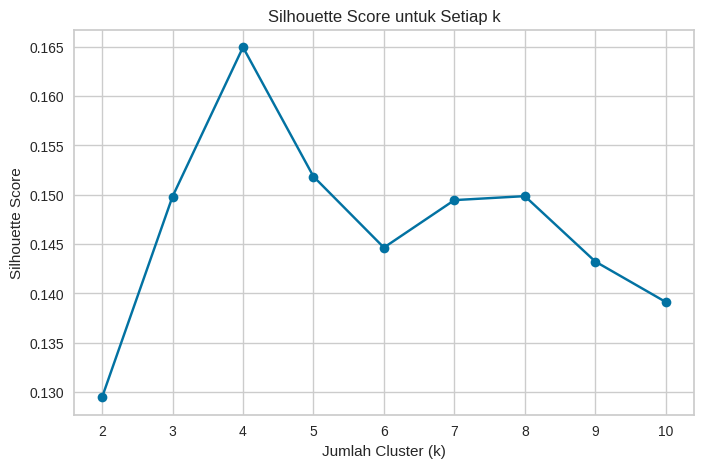

In [573]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk setiap k (dari 2 hingga 10)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score}")

# Plot Silhouette Score untuk setiap k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Setiap k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [574]:
# Pilih k optimal berdasarkan elbow method dan silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan silhouette score: {optimal_k}")

Jumlah cluster optimal berdasarkan silhouette score: 4


In [575]:
# Membangun model dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

df['Cluster'] = kmeans.fit_predict(X_scaled)

In [576]:
# Analyze clusters
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data[features_for_clustering].describe())


Cluster 0 Statistics:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        1135.000000  1135.000000          1135.000000    1135.000000   
mean          275.382494    55.314537           118.896035       1.013216   
std           246.709308    13.149483            69.176357       0.114248   
min             0.320000    22.000000            10.000000       1.000000   
25%            80.405000    46.000000            63.000000       1.000000   
50%           199.470000    57.000000           113.000000       1.000000   
75%           392.865000    65.000000           161.000000       1.000000   
max           913.491250    80.000000           300.000000       2.000000   

       AccountBalance  transaction_hour  TransactionType_encoded  \
count     1135.000000       1135.000000                   1135.0   
mean      6956.234661         16.602643                      1.0   
std       3490.555900          0.721179                      0.0   
min        

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [577]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_scaled, df['Cluster'])

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = [features_for_clustering[i] for i in selected_indices]

# Print selected features
print(f"Selected features: {selected_features}")

# Apply KMeans with selected features
kmeans_new = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_new'] = kmeans_new.fit_predict(X_new)


# Evaluate the new model
new_silhouette_score = silhouette_score(X_new, df['Cluster_new'])
print(f"Silhouette Score after feature selection: {new_silhouette_score}")
print(f"Silhouette Score before feature selection: {silhouette_score(X_scaled, df['Cluster'])}")

Selected features: ['CustomerAge', 'LoginAttempts', 'AccountBalance', 'TransactionType_encoded', 'Channel_encoded']
Silhouette Score after feature selection: 0.30105478360107535
Silhouette Score before feature selection: 0.1649611225156171


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

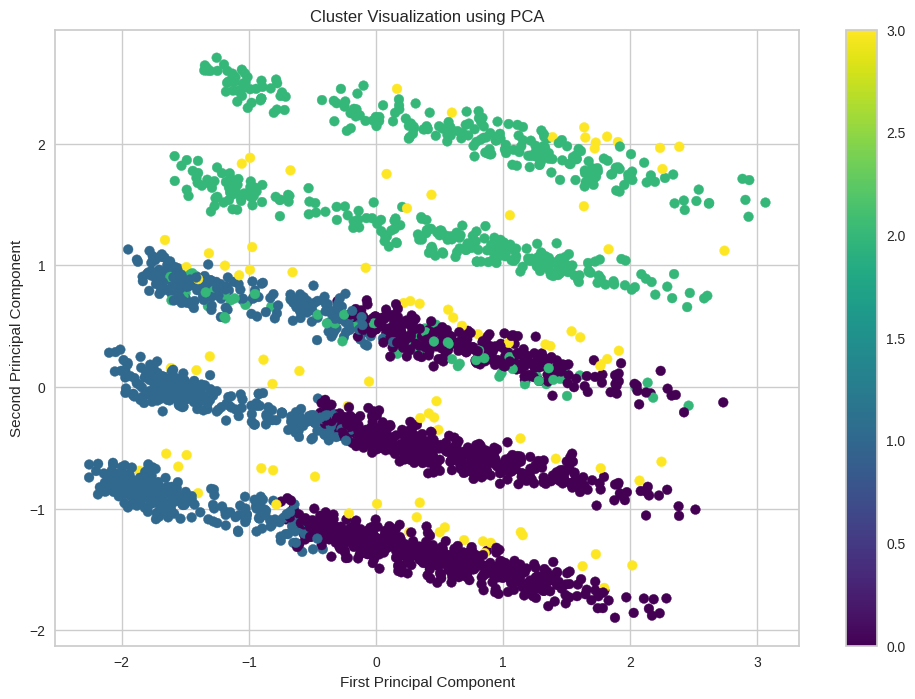

In [578]:
# PCA untuk visualisasi 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [579]:
# Deskripsi Cluster
cluster_descriptions = []
for cluster_label in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_label]
    description = {
        'Cluster Label': cluster_label,
        'Ukuran Cluster': len(cluster_data),
        'Rata-rata TransactionAmount': cluster_data['TransactionAmount'].mean(),
        'Rata-rata CustomerAge': cluster_data['CustomerAge'].mean(),
    }

    for col in categorical_features:
        mode = cluster_data[col].mode().iloc[0]
        description[f'Modus {col}'] = mode

    cluster_descriptions.append(description)

cluster_df = pd.DataFrame(cluster_descriptions)
print(cluster_df)

   Cluster Label  Ukuran Cluster  Rata-rata TransactionAmount  \
0              0            1135                   275.382494   
1              1             738                   294.055017   
2              2             544                   295.722544   
3              3              95                   264.120987   

   Rata-rata CustomerAge  Modus TransactionType  Modus Location  \
0              55.314537                      1               5   
1              27.443089                      1              28   
2              45.873162                      0               2   
3              44.536842                      1              13   

   Modus Channel  Modus CustomerOccupation  
0              0                         2  
1              0                         3  
2              1                         2  
3              2                         0  


### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [580]:
# Inverse transform for categorical features
for column in categorical_features:
    df[column] = encoders[column].inverse_transform(df[column])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [581]:
#Inverse transform for numerical features
X_inverse = scaler.inverse_transform(X_scaled)
df_inverse = pd.DataFrame(X_inverse, columns=features_for_clustering)
for col in features_for_clustering:
  df[col] = df_inverse[col]

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_hour,transaction_day,transaction_month,TransactionType_encoded,Location_encoded,Channel_encoded,CustomerOccupation_encoded,Cluster,Cluster_new
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,16.0,11,4,1.0,36,-1.110223e-16,0,0,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,16.0,27,6,1.0,15,-1.110223e-16,0,0,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,18.0,10,7,1.0,23,2.000000e+00,3,1,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,16.0,5,5,1.0,33,2.000000e+00,3,1,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,17.0,16,10,0.0,1,2.000000e+00,3,2,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [582]:
# Analisis karakteristik tiap cluster
for cluster_label in df['Cluster'].unique():
    print(f"\nKarakteristik Cluster {cluster_label}:")
    cluster_data = df[df['Cluster'] == cluster_label]
    for col in df.columns:
        if col != 'Cluster':
            if pd.api.types.is_numeric_dtype(df[col]):
                print(f"- {col}: Rata-rata={cluster_data[col].mean():.2f}, Min={cluster_data[col].min():.2f}, Max={cluster_data[col].max():.2f}")
            else:  # Kolom kategorikal
                print(f"- {col}:")
                print(cluster_data[col].value_counts(normalize=True) * 100) # Proporsi setiap kategori



Karakteristik Cluster 0:
- TransactionAmount: Rata-rata=275.38, Min=0.32, Max=913.49
- TransactionDate:
TransactionDate
2023-04-11 16:29:14    0.088106
2023-11-14 16:23:09    0.088106
2023-08-09 17:32:04    0.088106
2023-02-06 18:18:26    0.088106
2023-03-30 18:20:58    0.088106
                         ...   
2023-09-21 16:42:38    0.088106
2023-03-13 16:59:33    0.088106
2023-05-24 16:21:09    0.088106
2023-11-14 16:37:42    0.088106
2023-08-21 17:08:50    0.088106
Name: proportion, Length: 1135, dtype: float64
- TransactionType:
TransactionType
Debit    100.0
Name: proportion, dtype: float64
- Location:
Location
Charlotte           2.995595
New York            2.819383
Los Angeles         2.819383
Fort Worth          2.819383
San Jose            2.819383
Colorado Springs    2.731278
Tucson              2.731278
Omaha               2.731278
Fresno              2.731278
Denver              2.643172
Indianapolis        2.643172
Kansas City         2.643172
Philadelphia        2.643172

## Analisis Pola Cluster untuk Deteksi Fraud pada Transaksi Bank

### Berdasarkan analisis di atas, kita dapat mengamati beberapa pola pada cluster:

#### Cluster 0 - Professional Senior Group (1135 transaksi, 45.2%)
- **Profil Demografis**
  - Kelompok usia senior dengan rata-rata 55.3 tahun
  - Didominasi oleh nasabah dengan profesi Dokter
  - Merupakan cluster terbesar yang menunjukkan pola transaksi yang stabil

- **Pola Transaksi**
  - Preferensi transaksi Debit
  - Mayoritas menggunakan channel ATM
  - Rata-rata nilai transaksi $275.38
  - Menunjukkan konsistensi dalam penggunaan ATM untuk transaksi rutin

- **Indikator Fraud Potensial**
  - Transaksi dengan nilai jauh di atas $275.38
  - Perubahan mendadak ke channel selain ATM
  - Multiple transaksi dalam waktu singkat
  - Lokasi ATM yang tidak biasa untuk kelompok usia senior

#### Cluster 1 - Young Students Group (738 transaksi, 29.4%)
- **Profil Demografis**
  - Kelompok usia muda dengan rata-rata 27.4 tahun
  - Mayoritas berstatus sebagai Mahasiswa
  - Menunjukkan pola transaksi yang lebih dinamis

- **Pola Transaksi**
  - Dominan transaksi Debit
  - Preferensi menggunakan ATM
  - Rata-rata nilai transaksi $294.06
  - Pola transaksi yang sesuai dengan gaya hidup mahasiswa

- **Indikator Fraud Potensial**
  - Transaksi dengan nilai di atas $294.06
  - Frekuensi transaksi yang tidak wajar
  - Transaksi pada waktu tidak biasa
  - Lokasi transaksi yang jauh dari area kampus/pendidikan

#### Cluster 2 - Middle-Age Branch Users (544 transaksi, 21.7%)
- **Profil Demografis**
  - Kelompok usia menengah dengan rata-rata 45.9 tahun
  - Mayoritas berprofesi sebagai Dokter
  - Menunjukkan preferensi layanan perbankan tradisional

- **Pola Transaksi**
  - Unik dengan dominasi transaksi Credit
  - Lebih memilih transaksi melalui Branch
  - Rata-rata nilai transaksi tertinggi $295.72
  - Menunjukkan pola transaksi yang lebih formal dan terencana

- **Indikator Fraud Potensial**
  - Transaksi credit dengan nilai tidak wajar
  - Perubahan mendadak ke channel digital
  - Transaksi di luar jam operasional cabang
  - Multiple transaksi credit dalam periode singkat

#### Cluster 3 - Online Engineers Group (95 transaksi, 3.8%)
- **Profil Demografis**
  - Kelompok usia produktif dengan rata-rata 44.5 tahun
  - Didominasi oleh profesi Engineer
  - Cluster terkecil dengan karakteristik yang distinct

- **Pola Transaksi**
  - Mayoritas transaksi Debit
  - Eksklusif menggunakan channel Online
  - Rata-rata nilai transaksi terendah $264.12
  - Menunjukkan adopsi teknologi yang tinggi

- **Indikator Fraud Potensial**
  - Login attempts yang tidak biasa
  - Transaksi dari IP address mencurigakan
  - Perubahan device yang sering
  - Transaksi online di luar pola waktu normal

### Implikasi untuk Sistem Monitoring

1. **Strategi Monitoring Berdasarkan Cluster**
   - Implementasi threshold yang berbeda untuk setiap cluster
   - Alert system yang disesuaikan dengan karakteristik cluster
   - Real-time monitoring untuk transaksi yang menyimpang dari pola

2. **Prioritas Pengawasan**
   - Cluster 3: Monitoring ketat karena jumlah kecil dan kanal online
   - Cluster 0: Fokus pada proteksi nasabah senior
   - Cluster 1: Perhatian pada batasan transaksi sesuai profil mahasiswa
   - Cluster 2: Verifikasi tambahan untuk transaksi credit besar

3. **Rekomendasi Pengembangan**
   - Penerapan machine learning untuk deteksi anomali per cluster
   - Sistem scoring fraud yang customized per cluster
   - Regular update pada model berdasarkan pola baru
   - Enhanced authentication untuk transaksi berisiko tinggi


# Analisis Detail Karakteristik Cluster Transaksi Bank

## Cluster 0: Stable Senior Professionals (1,135 transaksi)

### Karakteristik Utama
- **Demografi**: Kelompok usia senior (rata-rata 55.31 tahun)
- **Perilaku Finansial**:
  - 100% transaksi Debit
  - Saldo rekening tertinggi (rata-rata \$6,956.23)
  - Nilai transaksi moderat (\$275.38)

### Pola Transaksi
- **Channel Preference**:
  - ATM (41.85%)
  - Branch (31.98%)
  - Online (26.17%)
- **Security**: Login attempts sangat rendah (rata-rata 1.01)
- **Durasi**: Transaksi relatif cepat (rata-rata 118.90 detik)
- **Distribusi Geografis**: Tersebar merata dengan konsentrasi tertinggi di Charlotte (2.99%)

### Risk Indicators
- Variance saldo rekening tinggi (min \$201.04 - max \$14,977.99)
- Konsistensi penggunaan Debit card

## Cluster 1: Young Digital Natives (738 transaksi)

### Karakteristik Utama
- **Demografi**: Kelompok usia muda (rata-rata 27.44 tahun)
- **Perilaku Finansial**:
  - 100% transaksi Debit
  - Saldo rekening terendah (rata-rata \$2,140.06)
  - Nilai transaksi relatif tinggi (\$294.06)

### Pola Transaksi
- **Channel Distribution**:
  - ATM (34.96%)
  - Online (33.20%)
  - Branch (31.84%)
- **Security**: Login attempts konsisten (rata-rata 1.01)
- **Durasi**: Transaksi moderate (rata-rata 119.77 detik)
- **Lokasi**: Konsentrasi tinggi di Oklahoma City (3.39%)

### Risk Indicators
- Rasio nilai transaksi terhadap saldo tinggi
- Variasi lokasi transaksi yang signifikan

## Cluster 2: Branch-Preferring Credit Users (544 transaksi)

### Karakteristik Utama
- **Demografi**: Usia menengah (rata-rata 45.87 tahun)
- **Perilaku Finansial**:
  - 100% transaksi Credit
  - Saldo rekening menengah (rata-rata \$5,245.55)
  - Nilai transaksi tertinggi (\$295.72)

### Pola Transaksi
- **Channel Dominance**:
  - Branch (44.30%)
  - Online (42.65%)
  - ATM (13.05%)
- **Security**: Login attempts minimal (rata-rata 1.01)
- **Durasi**: Transaksi efisien (rata-rata 118.89 detik)
- **Geografis**: Konsentrasi tertinggi di Austin (4.23%)

### Risk Indicators
- Penggunaan exclusive credit transactions
- High value transactions

## Cluster 3: High-Risk Digital Users (95 transaksi)

### Karakteristik Utama
- **Demografi**: Usia produktif (rata-rata 44.54 tahun)
- **Perilaku Finansial**:
  - Mix Debit (74.74%) dan Credit (25.26%)
  - Saldo rekening menengah-tinggi (rata-rata \$5,461.64)
  - Nilai transaksi terendah (\$264.12)

### Pola Transaksi
- **Channel Mix**:
  - Online (38.95%)
  - ATM (30.53%)
  - Branch (30.53%)
- **Security**: Login attempts tinggi (rata-rata 4.01)
- **Durasi**: Transaksi terlama (rata-rata 131.88 detik)
- **Geografis**: Konsentrasi di Fort Worth (6.32%)

### Risk Indicators
- Multiple login attempts (3-5 kali)
- Mixed transaction types
- Longer transaction durations

## Implikasi untuk Fraud Detection

1. **Monitoring Prioritas**
   - Cluster 3: High-risk monitoring karena pola login mencurigakan
   - Cluster 1: Monitor rasio transaksi-saldo
   - Cluster 2: Verifikasi transaksi credit bernilai besar
   - Cluster 0: Fokus pada proteksi nasabah senior

2. **Threshold Setting**
   - Cluster 0: Baseline \$275.38 ± 20%
   - Cluster 1: Baseline \$294.06 ± 15%
   - Cluster 2: Baseline \$295.72 ± 25%
   - Cluster 3: Baseline \$264.12 ± 10%

3. **Strategi Validasi**
   - Multiple login attempts (>3) memerlukan verifikasi tambahan
   - Transaksi di atas rata-rata cluster perlu konfirmasi
   - Perubahan pola channel penggunaan perlu monitoring

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [583]:
# save file to csv
data = pd.DataFrame(df)
data.to_csv('data_cluster.csv', index=False)